## Project 4
## Time series forecasting 
## World wide Products Inc.
### Data source : https://www.kaggle.com/felixzhao/productdemandforecasting
#### The dataset contains historical product demand for a manufacturing company with footprints globally. The company provides thousands of products within dozens of product categories. There are four central warehouses to ship products within the region it is  responsible for.

#### This dataset contains 1 CSV file.

#### Product_demand.csv - CSV data file containing product demand for encoded product id's

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import itertools
import warnings
warnings.filterwarnings('ignore')

#### Loading the data for data processing to get the required result

In [2]:
dataset=pd.read_csv("../data/external/Historical Product Demand.csv")
dataset.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500


## Data cleaning

#### Checking if there are any null values in the dataset

In [3]:
dataset.shape

(1048575, 5)

In [4]:
dataset.isnull().sum()

Product_Code            0
Warehouse               0
Product_Category        0
Date                11239
Order_Demand            0
dtype: int64

#### There are 11239 null values in Date column.So we can drop the rows with null values as they do not add any value

In [5]:
dataset.dropna(inplace=True)

In [6]:
dataset.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500


In [7]:
dataset.isnull().sum()

Product_Code        0
Warehouse           0
Product_Category    0
Date                0
Order_Demand        0
dtype: int64

In [8]:
dataset.shape

(1037336, 5)

#### From above result we can see null values have been removed and we can also see shape of dataset has changed

#### Removing extra characters from "order_demand"  and converting the column to float type

In [9]:
dataset['Order_Demand'] = dataset['Order_Demand'].replace( '[()]','', regex=True ).astype(float)
dataset.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100.0
1,Product_0979,Whse_J,Category_028,2012/1/19,500.0
2,Product_0979,Whse_J,Category_028,2012/2/3,500.0
3,Product_0979,Whse_J,Category_028,2012/2/9,500.0
4,Product_0979,Whse_J,Category_028,2012/3/2,500.0


#### Checking if there are any duplicate rows are present in the dataset

In [10]:
duplicaterows=dataset[dataset.duplicated(['Date', 'Product_Code','Warehouse','Product_Category'])]
duplicaterows.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
10,Product_0979,Whse_J,Category_028,2012/8/29,500.0
39,Product_1159,Whse_J,Category_006,2012/8/30,50000.0
51,Product_1157,Whse_J,Category_006,2012/3/8,150000.0
55,Product_1157,Whse_J,Category_006,2012/6/4,160000.0
67,Product_1274,Whse_J,Category_019,2012/1/24,1000.0


#### Replacing the duplicate rows with the mean

In [11]:
dataset=dataset.groupby(['Date','Product_Code','Warehouse','Product_Category'])['Order_Demand'].mean().reset_index()
dataset.head()

,Date,Product_Code,Warehouse,Product_Category,Order_Demand
0,2011/1/8,Product_0965,Whse_A,Category_006,2.0
1,2011/10/20,Product_0125,Whse_S,Category_011,2.0
2,2011/10/20,Product_0412,Whse_S,Category_007,2.0
3,2011/10/31,Product_0642,Whse_C,Category_019,3.0
4,2011/11/18,Product_0131,Whse_S,Category_021,12.0


In [12]:
dataset.shape

(634553, 5)

In [13]:
avg_of_demand_product=dataset.groupby('Product_Code')['Order_Demand'].mean().reset_index()
avg_of_demand_product = avg_of_demand_product.sort_values('Order_Demand', ascending = False)
avg_of_demand_product.head()

,Product_Code,Order_Demand
1234,Product_1245,169194.039735
1141,Product_1152,140923.015873
82,Product_0083,133575.685166
1155,Product_1166,125358.974359
83,Product_0084,100223.809524


## Data exploration

#### Plotting graph for category versus order demand to know which category has highest demand

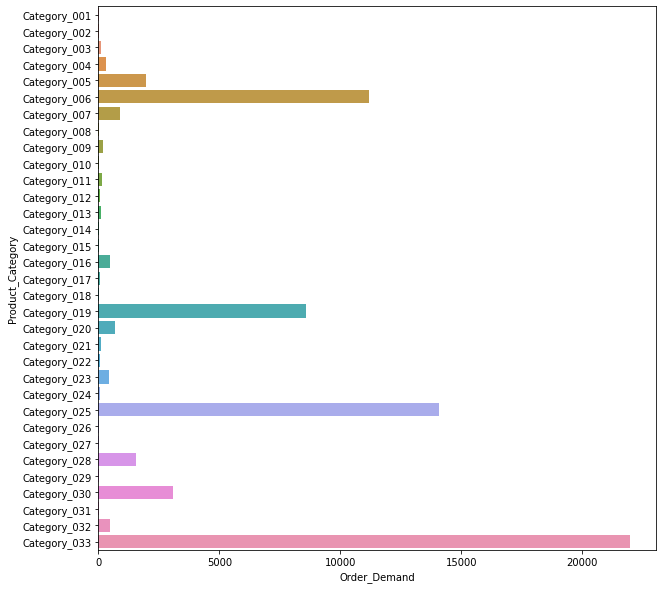

In [14]:
avg_demand=dataset.groupby('Product_Category')['Order_Demand'].mean().reset_index()
plt.figure(figsize=(10,10))
ax = sns.barplot(x='Order_Demand',y='Product_Category',data=avg_demand.head(33))
ax.set(xlabel='Order_Demand', ylabel='Product_Category')
plt.show()

#### We can see from above plot Category_033 has highest demand

#### Finding number of unique products sold by each ware house

           Product_Code
Warehouse              
Whse_J             1625
Whse_S              553
Whse_A              427
Whse_C              244


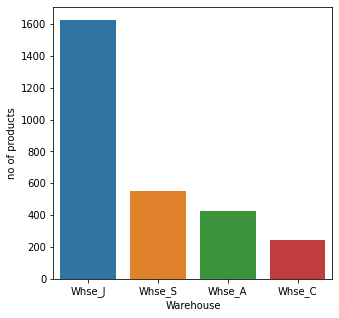

In [15]:
numberofproducts= dataset.groupby(['Warehouse'])['Product_Code'].nunique().sort_values(ascending= False).to_frame()
print(numberofproducts)
numberofproducts['Warehouse'] = numberofproducts.index.tolist()
numberofproducts.columns = ['Warehouse','no of products']
numberofproducts.index= np.arange(0,len(numberofproducts))
plt.figure(figsize=(5,5))
ax = sns.barplot(x='no of products',y='Warehouse',data=numberofproducts)
ax.set(xlabel='Warehouse', ylabel='no of products')
plt.show()

In [16]:
dataset['Date'].min(), dataset['Date'].max()

('2011/1/8', '2017/1/9')

#### Changing datatype for Date column

In [17]:
import dateutil
dataset['Date'] = dataset['Date'].apply(dateutil.parser.parse)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634553 entries, 0 to 634552
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              634553 non-null  datetime64[ns]
 1   Product_Code      634553 non-null  object        
 2   Warehouse         634553 non-null  object        
 3   Product_Category  634553 non-null  object        
 4   Order_Demand      634553 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 24.2+ MB


In [18]:
dataset.dtypes

Date                datetime64[ns]
Product_Code                object
Warehouse                   object
Product_Category            object
Order_Demand               float64
dtype: object

#### We can see from above the datatype of Date is changed to datetime

#### Extracting date features from Date coulmn into three separate rows "date","month" and "year"

In [19]:
dataset['date'] = dataset.Date.dt.day
dataset['month'] = dataset.Date.dt.month
dataset['year'] = dataset.Date.dt.year
dataset.head()

,Date,Product_Code,Warehouse,Product_Category,Order_Demand,date,month,year
0,2011-01-08,Product_0965,Whse_A,Category_006,2.0,8,1,2011
1,2011-10-20,Product_0125,Whse_S,Category_011,2.0,20,10,2011
2,2011-10-20,Product_0412,Whse_S,Category_007,2.0,20,10,2011
3,2011-10-31,Product_0642,Whse_C,Category_019,3.0,31,10,2011
4,2011-11-18,Product_0131,Whse_S,Category_021,12.0,18,11,2011


In [20]:
dataset2 = dataset.groupby('year')['Order_Demand'].mean().reset_index(name='avg_order_demand')
dataset2.head()

,year,avg_order_demand
0,2011,11937.022080
1,2012,3779.743169
2,2013,3849.349718
3,2014,3969.244680
4,2015,4253.815594


#### Below we can see the plot for order demand over the years

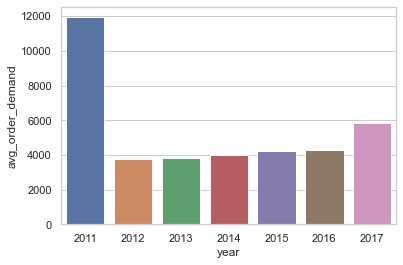

In [21]:
sns.set(style="whitegrid")
ax = sns.barplot(x="year", y="avg_order_demand", data=dataset2)

#### checking which products are being product in most warehouses

In [22]:
numberofhouses= dataset.groupby(['Product_Code'])['Warehouse'].nunique().sort_values(ascending= False).to_frame()
print(numberofhouses.head())

              Warehouse
Product_Code           
Product_0471          4
Product_0349          4
Product_0642          4
Product_1387          4
Product_2138          4


#### Below plot shows products with hightest demand

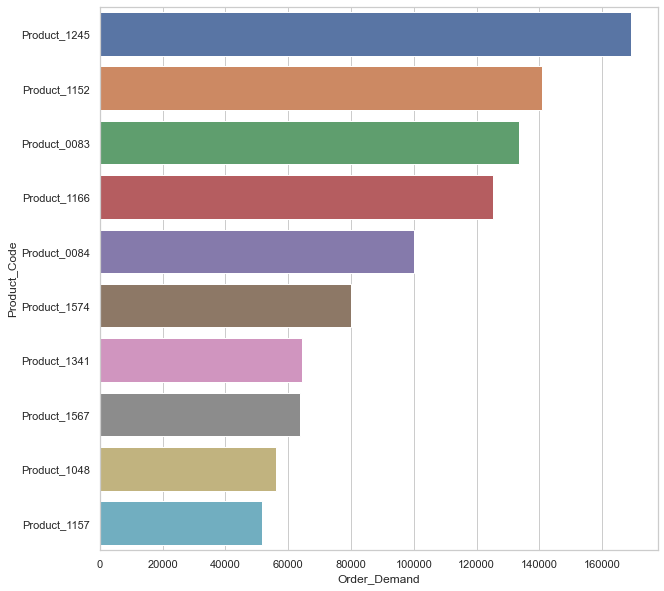

In [23]:
plt.figure(figsize=(10,10))
ax = sns.barplot(x='Order_Demand',y='Product_Code',data=avg_of_demand_product.head(10))
ax.set(xlabel='Order_Demand', ylabel='Product_Code')
plt.show()

 #### We can see from above plot product_1245 has high demand with moe than 160000 count

#### considering Product_1245 which has highest demad from above graph

In [24]:
datasetprod1245 = dataset.loc[dataset['Product_Code'] == 'Product_1245'].sort_values(['Date'],ascending=False)
datasetprod1245.head()

,Date,Product_Code,Warehouse,Product_Category,Order_Demand,date,month,year
549427,2016-12-21,Product_1245,Whse_C,Category_019,4000.0,21,12,2016
545846,2016-12-13,Product_1245,Whse_C,Category_019,3000.0,13,12,2016
553245,2016-12-08,Product_1245,Whse_C,Category_019,1600000.0,8,12,2016
552673,2016-12-07,Product_1245,Whse_C,Category_019,6000.0,7,12,2016
548404,2016-12-02,Product_1245,Whse_C,Category_019,5000.0,2,12,2016


In [25]:
datasetprod1245 = datasetprod1245.drop(columns=['Product_Code','Product_Category','date','month','year'])
datasetprod1245.index=pd.to_datetime(datasetprod1245.Date,format='%Y/%m/%d')
datasetprod1245.drop(columns=['Date'],inplace=True)

In [26]:
datasetprod1245.tail()

,Warehouse,Order_Demand
Date,,
2012-01-16,Whse_S,20000.0
2012-01-11,Whse_S,15000.0
2012-01-11,Whse_C,30000.0
2012-01-09,Whse_S,10000.0
2011-12-28,Whse_C,450000.0


In [27]:
prod1245DmndMnth = datasetprod1245.resample('M').sum()
prod1245DmndMnth.tail(10)

,Order_Demand
Date,
2016-03-31,3402000.0
2016-04-30,1605000.0
2016-05-31,502000.0
2016-06-30,1731000.0
2016-07-31,800000.0
2016-08-31,2221000.0
2016-09-30,430000.0
2016-10-31,2179000.0
2016-11-30,11000.0


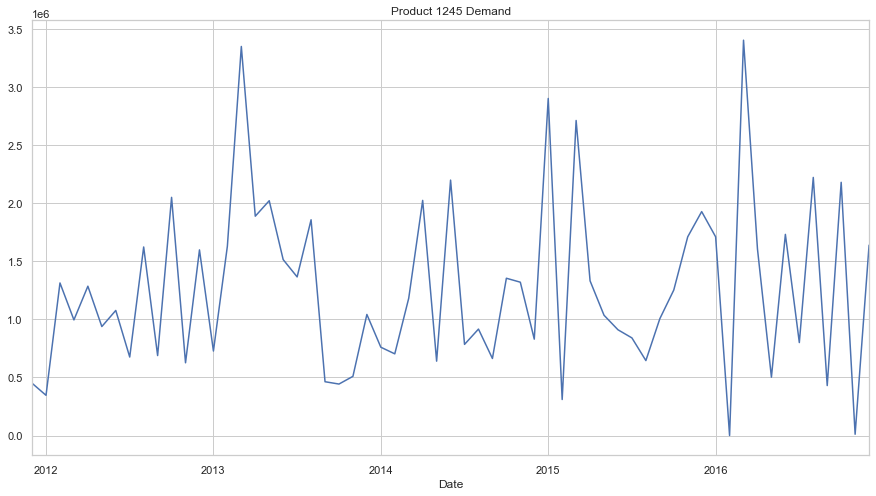

In [28]:
prod1245DmndMnth.Order_Demand.plot(figsize=(15,8), title= 'Product 1245 Demand')
plt.show()

#### We can see from above plot the demand for product_1245 have been increasing and decreasing over the year starting from 2012 to 2016 with its highest demad in 2016 and also least demand in the same year 2016

## FbProphet model for Forecasting 

In [29]:
from fbprophet import Prophet

#### determing demand for prod_1245 

In [30]:
dataset_group2 = dataset[dataset['Product_Code'] == 'Product_1245']
dataset_group2 = dataset_group2.drop(['Warehouse','Product_Category','date','year','Product_Code','month'],1)

In [31]:
dataset_group2 = dataset_group2.rename(columns = {'Date': 'ds', 'Order_Demand': 'y' })
dataset_group2.head()

,ds,y
386,2011-12-28,450000.0
1312,2012-01-11,30000.0
1313,2012-01-11,15000.0
2788,2012-01-16,20000.0
3724,2012-01-18,201000.0


In [32]:
obj = Prophet(daily_seasonality=True)
obj.fit(dataset_group2)

In [33]:
future = obj.make_future_dataframe(periods=365)

In [34]:
forecast = obj.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
813,2017-12-17,390250.713574,42915.780364,717124.426102
814,2017-12-18,440395.766888,124330.690998,734377.780940
815,2017-12-19,454986.717162,132527.458740,789914.628965
816,2017-12-20,446340.684257,141417.437129,777335.155990
817,2017-12-21,483911.040177,140540.488333,809408.430884


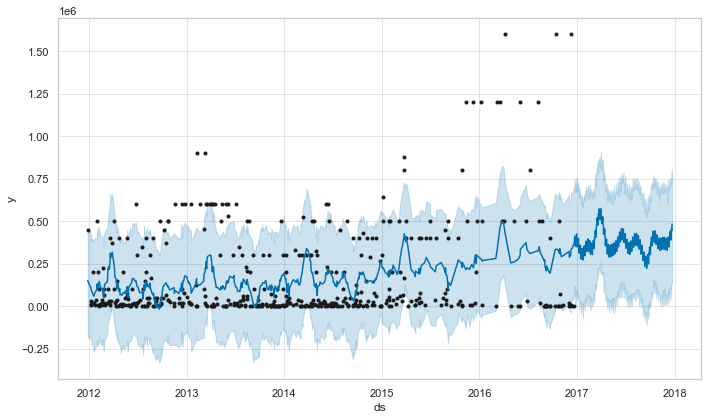

In [35]:
figure1 = obj.plot(forecast)

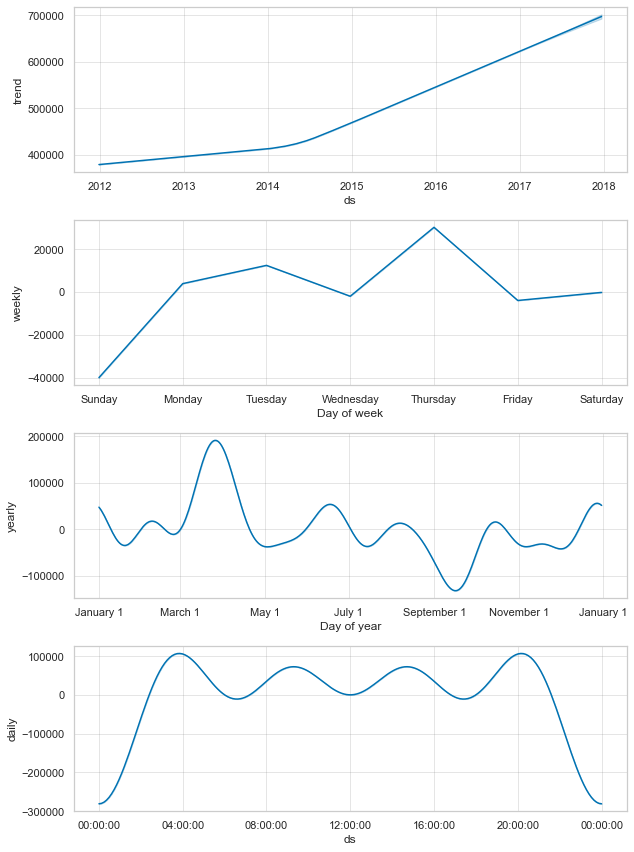

In [36]:
figure2 = obj.plot_components(forecast)

## Observations

#### The demand for product_1245 has been increasing from 2012 with a high increase from 2014
#### If we see weekly trend,the demand is great on Thursday and it goes negative on sundays 
#### If we see yearly,the demand is high during mid of March and less during September
#### If we see daily the demand is more during early hours 4:00 am and in the night 8:00 pm

## ARIMA Model

#### SARIMAX, is used to model and predict future points of a time series.

#### ARIMA component is used to fit time-series data to better understand and forecast future points in the time series.

In [37]:
import statsmodels.api as sm
model = sm.tsa.statespace.SARIMAX(prod1245DmndMnth,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = model.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4345      0.274     -1.584      0.113      -0.972       0.103
ma.L1         -0.6573      0.215     -3.054      0.002      -1.079      -0.236
ar.S.L12      -0.4815      0.225     -2.137      0.033      -0.923      -0.040
sigma2      8.342e+11   1.32e-13   6.33e+24      0.000    8.34e+11    8.34e+11


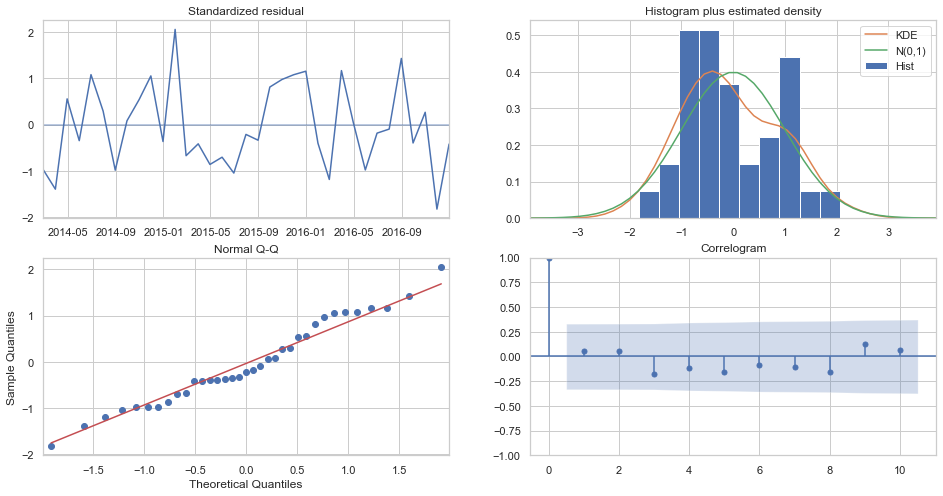

In [38]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [39]:
pd.plotting.register_matplotlib_converters()

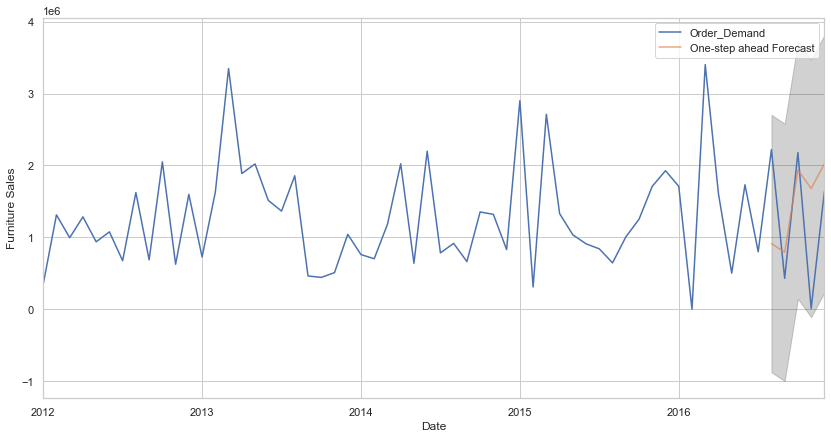

In [40]:
pred = results.get_prediction(start=pd.to_datetime('2016-08-31'), dynamic=False)
pred_ci = pred.conf_int()
ax = prod1245DmndMnth['2012':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()